In [1]:
!pip install pandas statsmodels seaborn matplotlib

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.api import VAR


In [2]:
df = pd.read_csv('data/history.csv')

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2008-01-29,9.50,9.99,8.57,8.75,0.702589,1489000,AACG
1,2008-01-30,8.75,9.15,8.30,8.50,0.682516,219000,AACG
2,2008-01-31,8.49,10.30,8.49,9.55,0.766826,182300,AACG
3,2008-02-01,9.93,9.94,9.50,9.51,0.763614,28200,AACG
4,2008-02-04,9.50,9.71,9.50,9.50,0.762811,8300,AACG


In [5]:
df_category=pd.read_csv('data/sp500_companies.csv')
df_category.head(5)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [6]:
df_factors=pd.read_csv('data/fed_stock_data_preprocessed.csv')
df_factors.head(5)

,Unnamed: 0,FedFundsRate,Treasury10Y,Unemployment,CPI,GDP,M2,YieldCurve10Y2Y,Recession,VIX,...,NASDAQ_Return_Lag5,Russell2000_LogReturn,Russell2000_Return_Lag1,Russell2000_Return_Lag5,SP500_SMA20,SP500_EMA20,SP500_RSI,SP500_EMA12,SP500_EMA26,SP500_MACD
0,2010-01-01,0.11,3.85,9.8,217.488000,16582.710000,8478.000000,2.76,0.0,20.04,...,0.000126,-0.002518,-0.002515,-0.002515,1124.204004,1132.989990,33.114902,1132.989990,1132.989990,0.000000
1,2010-01-04,0.11,3.85,9.8,217.478143,16585.217062,8480.361905,2.76,0.0,20.04,...,0.000126,-0.002518,-0.002515,-0.002515,1124.204004,1132.989990,33.114902,1132.989990,1132.989990,0.000000
2,2010-01-05,0.11,3.77,9.8,217.468286,16587.724125,8482.723810,2.76,0.0,19.35,...,0.000126,-0.002518,-0.002515,-0.002515,1124.204004,1133.326184,33.114902,1133.533072,1133.251474,0.281598
3,2010-01-06,0.11,3.85,9.8,217.458429,16590.231187,8485.085714,2.84,0.0,19.16,...,0.000126,-0.000846,-0.002515,-0.002515,1124.204004,1133.689406,33.114902,1134.087986,1133.539514,0.548472
4,2010-01-07,0.11,3.85,9.8,217.448571,16592.738250,8487.447619,2.82,0.0,19.06,...,0.000126,0.006282,-0.000846,-0.002515,1124.204004,1134.451361,33.114902,1135.257518,1134.143249,1.114268


In [7]:
df_factors.rename(columns={'Unnamed: 0':'Date'},inplace=True)

In [8]:
df_factors.head(5)

,Date,FedFundsRate,Treasury10Y,Unemployment,CPI,GDP,M2,YieldCurve10Y2Y,Recession,VIX,...,NASDAQ_Return_Lag5,Russell2000_LogReturn,Russell2000_Return_Lag1,Russell2000_Return_Lag5,SP500_SMA20,SP500_EMA20,SP500_RSI,SP500_EMA12,SP500_EMA26,SP500_MACD
0,2010-01-01,0.11,3.85,9.8,217.488000,16582.710000,8478.000000,2.76,0.0,20.04,...,0.000126,-0.002518,-0.002515,-0.002515,1124.204004,1132.989990,33.114902,1132.989990,1132.989990,0.000000
1,2010-01-04,0.11,3.85,9.8,217.478143,16585.217062,8480.361905,2.76,0.0,20.04,...,0.000126,-0.002518,-0.002515,-0.002515,1124.204004,1132.989990,33.114902,1132.989990,1132.989990,0.000000
2,2010-01-05,0.11,3.77,9.8,217.468286,16587.724125,8482.723810,2.76,0.0,19.35,...,0.000126,-0.002518,-0.002515,-0.002515,1124.204004,1133.326184,33.114902,1133.533072,1133.251474,0.281598
3,2010-01-06,0.11,3.85,9.8,217.458429,16590.231187,8485.085714,2.84,0.0,19.16,...,0.000126,-0.000846,-0.002515,-0.002515,1124.204004,1133.689406,33.114902,1134.087986,1133.539514,0.548472
4,2010-01-07,0.11,3.85,9.8,217.448571,16592.738250,8487.447619,2.82,0.0,19.06,...,0.000126,0.006282,-0.000846,-0.002515,1124.204004,1134.451361,33.114902,1135.257518,1134.143249,1.114268


In [9]:
df_category.rename(columns={'GICS Sector': 'Sector'}, inplace=True)
df_category.head(5)

,Symbol,Security,Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [10]:
df_new = df.merge(df_category[['Symbol', 'Sector']], on='Symbol', how='left')


In [11]:
df_new.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector
0,2008-01-29,9.50,9.99,8.57,8.75,0.702589,1489000,AACG,NaN
1,2008-01-30,8.75,9.15,8.30,8.50,0.682516,219000,AACG,NaN
2,2008-01-31,8.49,10.30,8.49,9.55,0.766826,182300,AACG,NaN
3,2008-02-01,9.93,9.94,9.50,9.51,0.763614,28200,AACG,NaN
4,2008-02-04,9.50,9.71,9.50,9.50,0.762811,8300,AACG,NaN


In [12]:
df_update= df_new.dropna()

In [13]:
df_update.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector
52795,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600,AAPL,Information Technology
52796,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,AAPL,Information Technology
52797,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,AAPL,Information Technology
52798,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,AAPL,Information Technology
52799,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,AAPL,Information Technology


In [14]:
start_date = '2010-01-01'
end_date = '2024-12-31'

df_filtered = df_update[(df_update['Date'] >= start_date) & (df_update['Date'] <= end_date)]

In [15]:
df_filtered.head(501)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector
60126,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600,AAPL,Information Technology
60127,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800,AAPL,Information Technology
60128,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000,AAPL,Information Technology
60129,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200,AAPL,Information Technology
60130,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800,AAPL,Information Technology
...,...,...,...,...,...,...,...,...,...
60622,2011-12-20,13.848571,14.146429,13.830714,14.141071,11.955606,337215200,AAPL,Information Technology
60623,2011-12-21,14.167500,14.189286,14.000357,14.158929,11.970704,262948000,AAPL,Information Technology
60624,2011-12-22,14.178571,14.254643,14.146429,14.233929,12.034115,202358800,AAPL,Information Technology
60625,2011-12-23,14.274643,14.413929,14.267500,14.404643,12.178449,269399200,AAPL,Information Technology


In [16]:
df_filtered.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector
23020417,2024-06-27,174.490005,181.660004,174.259995,176.460007,176.460007,4164700,ZTS,Health Care
23020418,2024-06-28,176.460007,177.070007,173.029999,173.360001,173.360001,4189600,ZTS,Health Care
23020419,2024-07-01,173.259995,175.460007,172.000000,172.580002,172.580002,1589800,ZTS,Health Care
23020420,2024-07-02,172.490005,175.990005,172.490005,174.809998,174.809998,2454200,ZTS,Health Care
23020421,2024-07-03,175.440002,177.669998,175.259995,175.600006,175.600006,1251800,ZTS,Health Care


In [17]:
df_merged = pd.merge(df_filtered, df_factors, on='Date', how='left')

In [18]:
df_merged.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector,FedFundsRate,...,NASDAQ_Return_Lag5,Russell2000_LogReturn,Russell2000_Return_Lag1,Russell2000_Return_Lag5,SP500_SMA20,SP500_EMA20,SP500_RSI,SP500_EMA12,SP500_EMA26,SP500_MACD
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600,AAPL,Information Technology,0.11,...,0.000126,-0.002518,-0.002515,-0.002515,1124.204004,1132.989990,33.114902,1132.989990,1132.989990,0.000000
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800,AAPL,Information Technology,0.11,...,0.000126,-0.002518,-0.002515,-0.002515,1124.204004,1133.326184,33.114902,1133.533072,1133.251474,0.281598
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000,AAPL,Information Technology,0.11,...,0.000126,-0.000846,-0.002515,-0.002515,1124.204004,1133.689406,33.114902,1134.087986,1133.539514,0.548472
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200,AAPL,Information Technology,0.11,...,0.000126,0.006282,-0.000846,-0.002515,1124.204004,1134.451361,33.114902,1135.257518,1134.143249,1.114268
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800,AAPL,Information Technology,0.11,...,0.000126,0.004026,0.006301,-0.002515,1124.204004,1135.454087,33.114902,1136.753281,1134.945970,1.807311


In [19]:
correlation = df_merged[['Close','FedFundsRate', 'Treasury10Y', 'CPI', 'GDP','Unemployment','VIX']].corr()


In [20]:
correlation.head()

,Close,FedFundsRate,Treasury10Y,CPI,GDP,Unemployment,VIX
Close,1.000000,0.164657,0.049653,0.237915,0.243245,-0.156653,0.003707
FedFundsRate,0.164657,1.000000,0.687957,0.786297,0.721063,-0.563323,-0.152113
Treasury10Y,0.049653,0.687957,1.000000,0.370576,0.228729,-0.267711,-0.220528
CPI,0.237915,0.786297,0.370576,1.000000,0.958331,-0.619436,0.048540
GDP,0.243245,0.721063,0.228729,0.958331,1.000000,-0.726783,-0.016200


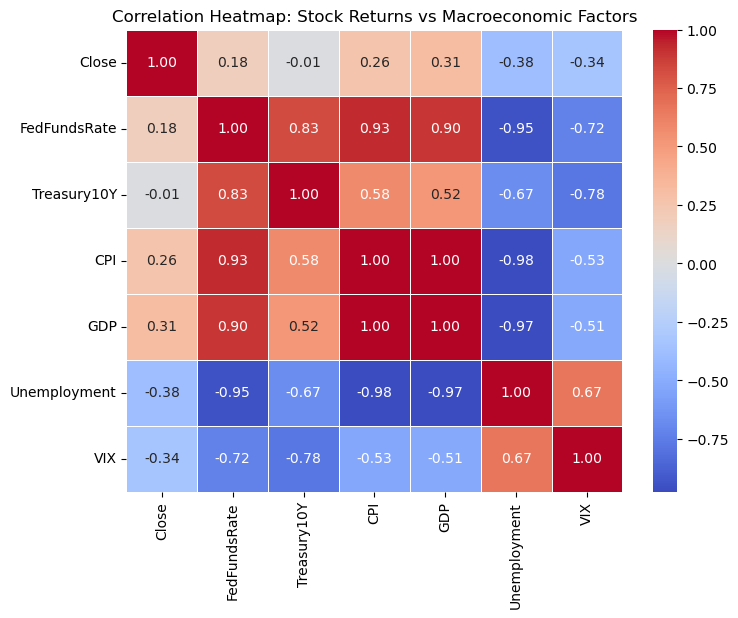

In [21]:
corr_matrix = correlation.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Stock Returns vs Macroeconomic Factors")
plt.show()

In [22]:
df_clean=df_merged[['Open','Close','Sector','FedFundsRate', 'Treasury10Y', 'CPI', 'GDP','Unemployment','VIX']]
df_clean.head()

,Open,Close,Sector,FedFundsRate,Treasury10Y,CPI,GDP,Unemployment,VIX
0,7.622500,7.643214,Information Technology,0.11,3.85,217.478143,16585.217062,9.8,20.04
1,7.664286,7.656429,Information Technology,0.11,3.77,217.468286,16587.724125,9.8,19.35
2,7.656429,7.534643,Information Technology,0.11,3.85,217.458429,16590.231187,9.8,19.16
3,7.562500,7.520714,Information Technology,0.11,3.85,217.448571,16592.738250,9.8,19.06
4,7.510714,7.570714,Information Technology,0.11,3.83,217.438714,16595.245312,9.8,18.13


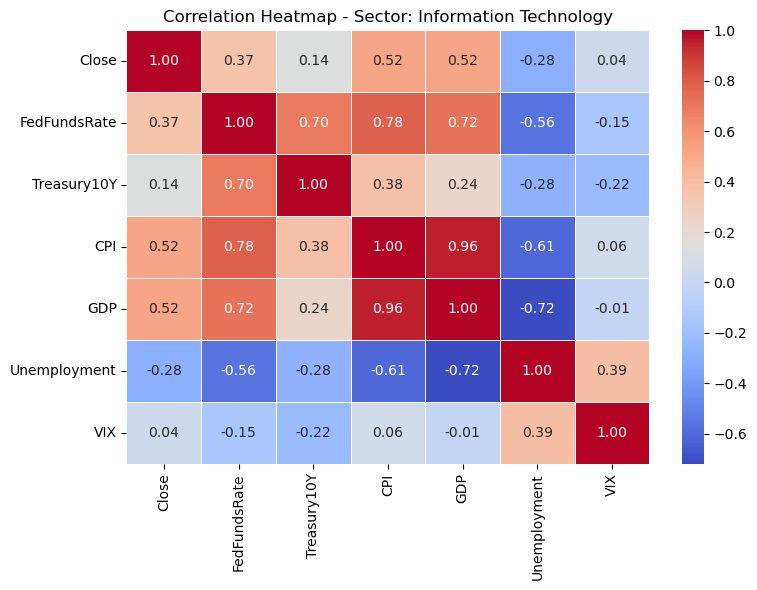

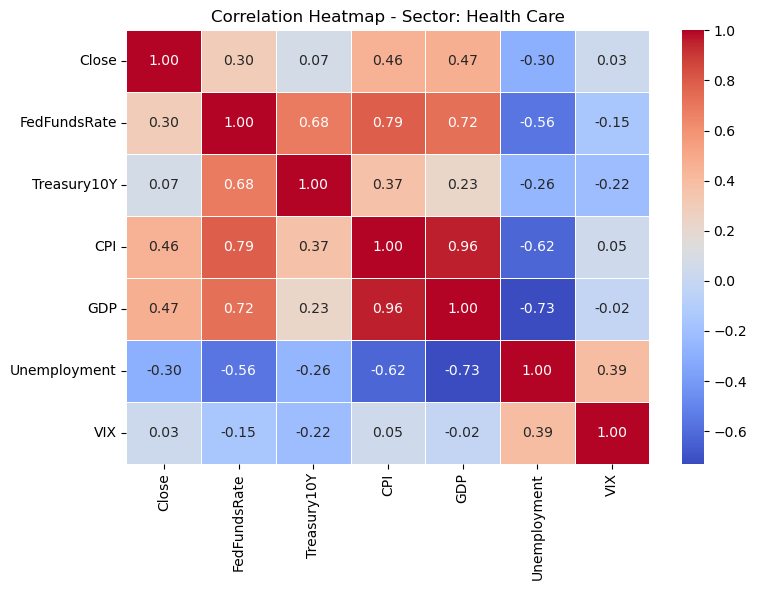

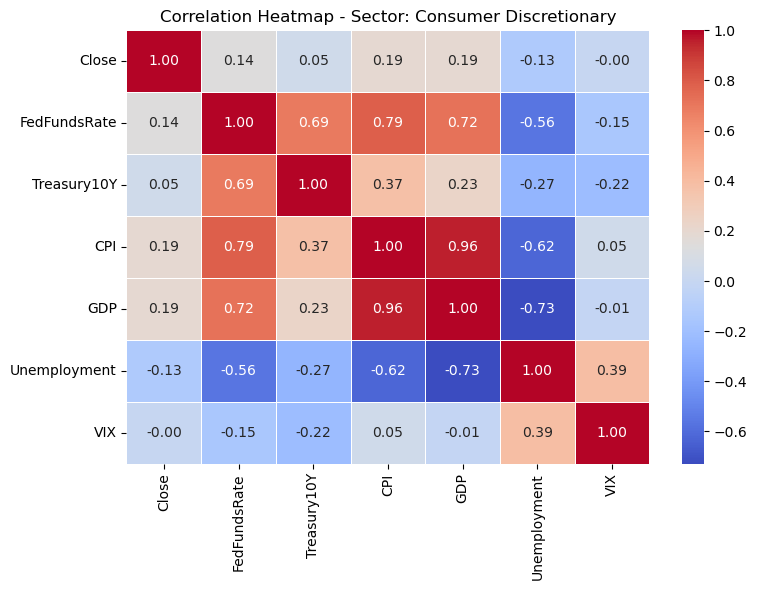

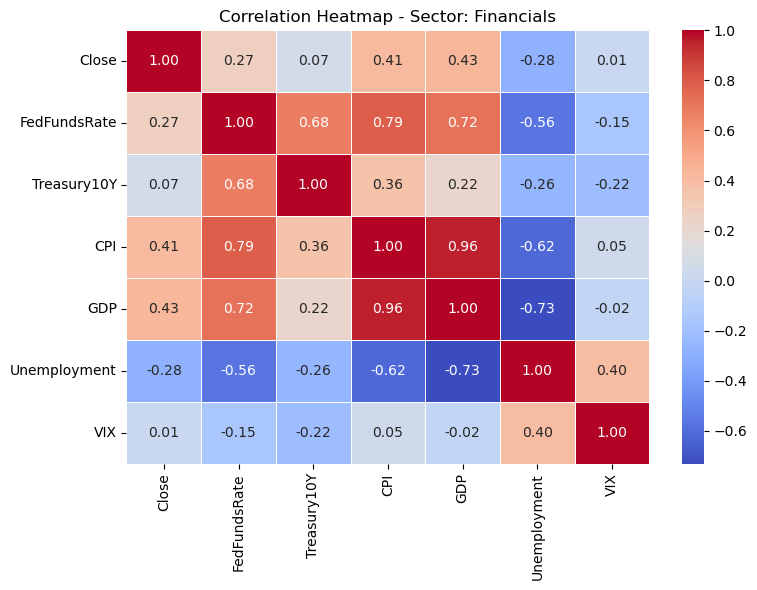

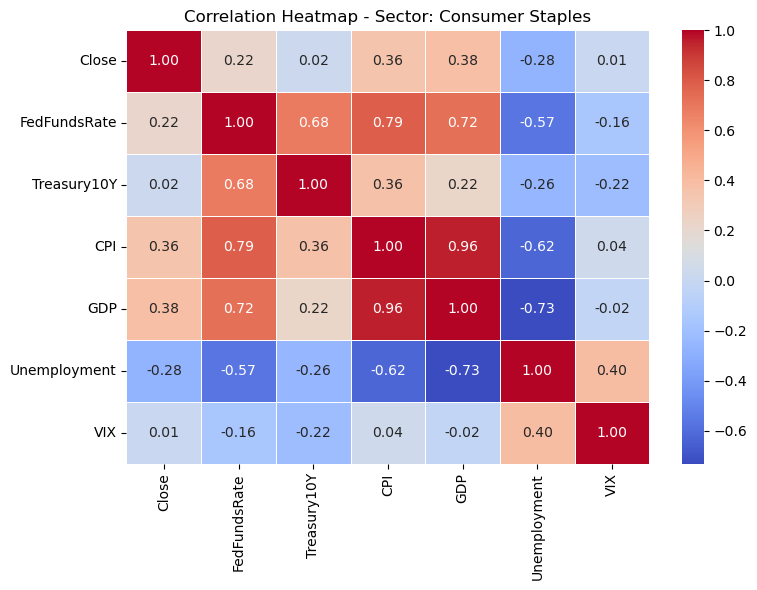

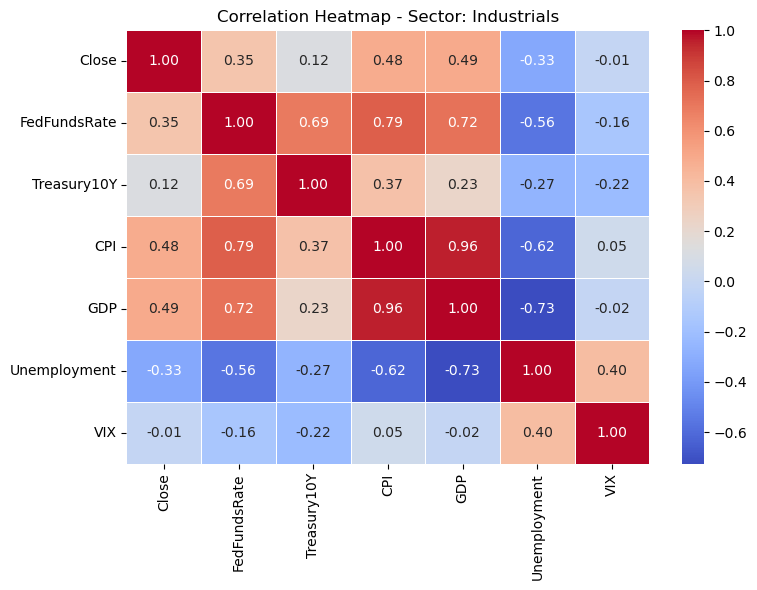

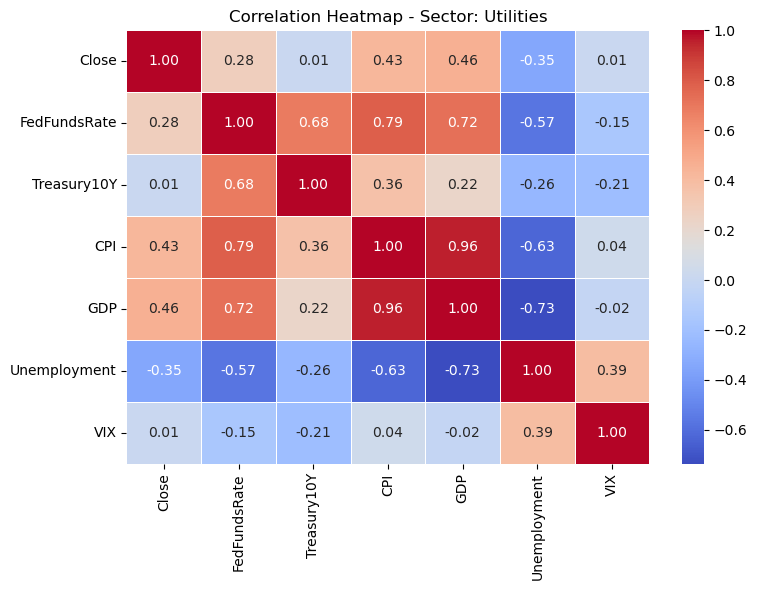

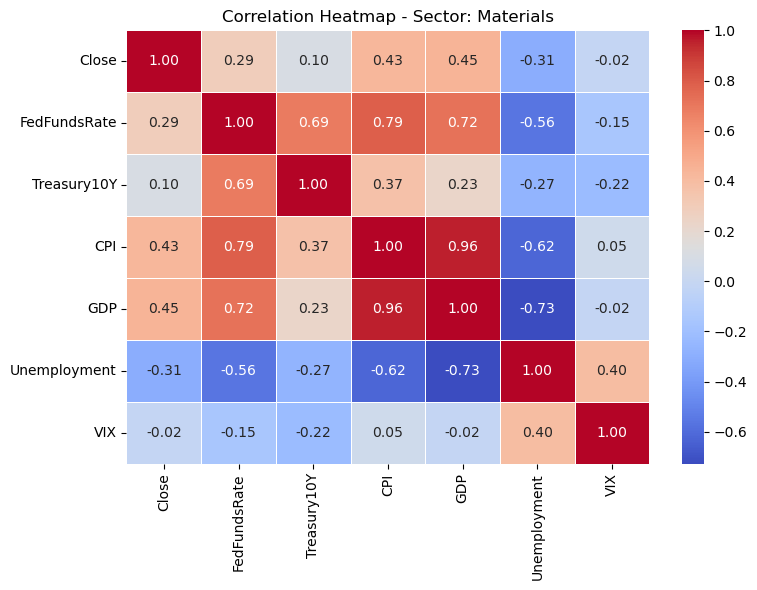

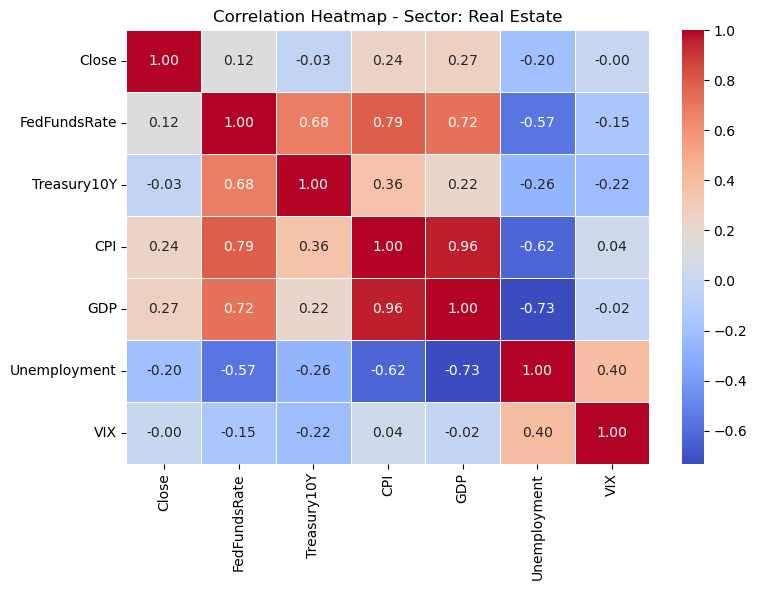

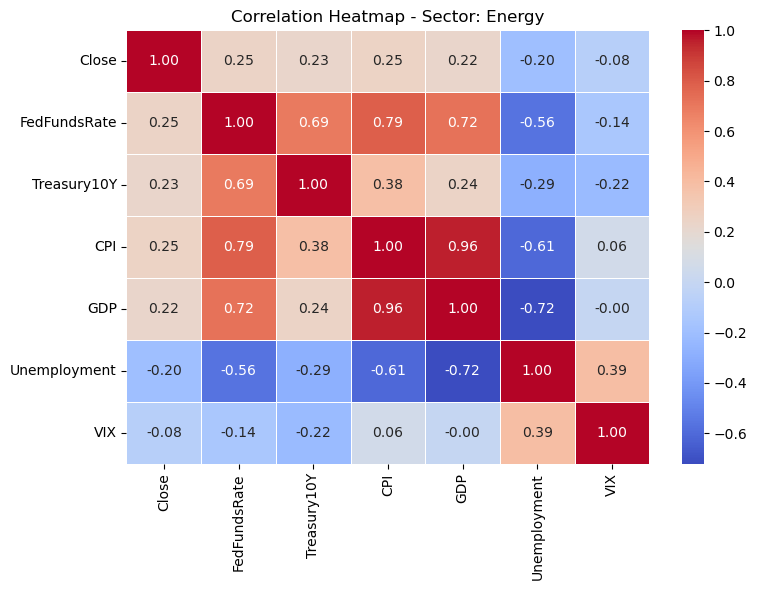

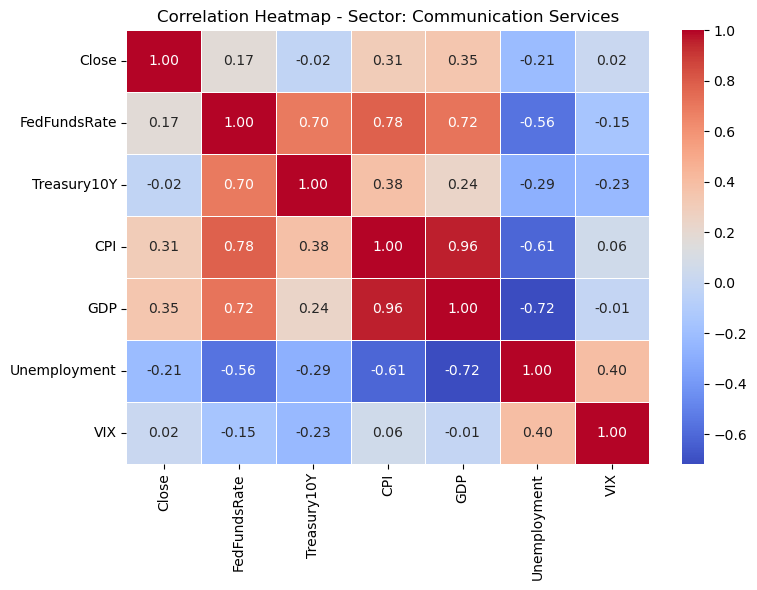

In [23]:
sectors = df_clean['Sector'].unique()

# Plot heatmap for each sector
for sector in sectors:
    sector_df = df_clean[df_clean['Sector'] == sector]
    corr = sector_df[['Close', 'FedFundsRate', 'Treasury10Y', 'CPI', 'GDP', 'Unemployment', 'VIX']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Heatmap - Sector: {sector}")
    plt.tight_layout()
    plt.show()



In [24]:
plt.savefig(f"{sector}_correlation_heatmap.png")

<Figure size 640x480 with 0 Axes>

In [25]:


# Step 1: Parse date and sort
df_merged["Date"] = pd.to_datetime(df_merged["Date"])
df_merged = df_merged.sort_values(["Sector", "Date"])

# Output path for IRF plots
output_path = "./var_irf_by_sector"
os.makedirs(output_path, exist_ok=True)

# Configuration
macro_vars = ["FedFundsRate", "CPI", "Unemployment"]
value_col = "Close"
sectors = df_merged["Sector"].unique()

# Step 2: Loop through sectors and run VAR
for sector in sectors:
    try:
        print(f"Running VAR for sector: {sector}")
        sector_df = df_merged[df_merged["Sector"] == sector].copy()

        # Ensure Date is still present
        sector_df["Month"] = sector_df["Date"].dt.to_period("M")
        monthly_df = sector_df.groupby("Month")[[value_col] + macro_vars].mean().dropna()

        df_diff = monthly_df.diff().dropna()

        model = VAR(df_diff)
        results = model.fit(maxlags=2, ic="aic")

        fig = results.irf(12).plot(orth=True)
        fig.suptitle(f"IRF - {sector}", fontsize=14)
        plt.tight_layout()
        fig_path = os.path.join(output_path, f"VAR_IRF_{sector.replace(' ', '_')}.png")
        plt.savefig(fig_path)
        plt.close()
        print(f"✅ Saved: {fig_path}")

    except Exception as e:
        print(f"❌ Failed for sector {sector}: {e}")


Running VAR for sector: Communication Services
✅ Saved: ./var_irf_by_sector\VAR_IRF_Communication_Services.png
Running VAR for sector: Consumer Discretionary
✅ Saved: ./var_irf_by_sector\VAR_IRF_Consumer_Discretionary.png
Running VAR for sector: Consumer Staples
✅ Saved: ./var_irf_by_sector\VAR_IRF_Consumer_Staples.png
Running VAR for sector: Energy
✅ Saved: ./var_irf_by_sector\VAR_IRF_Energy.png
Running VAR for sector: Financials
✅ Saved: ./var_irf_by_sector\VAR_IRF_Financials.png
Running VAR for sector: Health Care
✅ Saved: ./var_irf_by_sector\VAR_IRF_Health_Care.png
Running VAR for sector: Industrials
✅ Saved: ./var_irf_by_sector\VAR_IRF_Industrials.png
Running VAR for sector: Information Technology
✅ Saved: ./var_irf_by_sector\VAR_IRF_Information_Technology.png
Running VAR for sector: Materials
✅ Saved: ./var_irf_by_sector\VAR_IRF_Materials.png
Running VAR for sector: Real Estate
✅ Saved: ./var_irf_by_sector\VAR_IRF_Real_Estate.png
Running VAR for sector: Utilities
✅ Saved: ./var_i

📊 Showing: VAR_IRF_Communication_Services.png


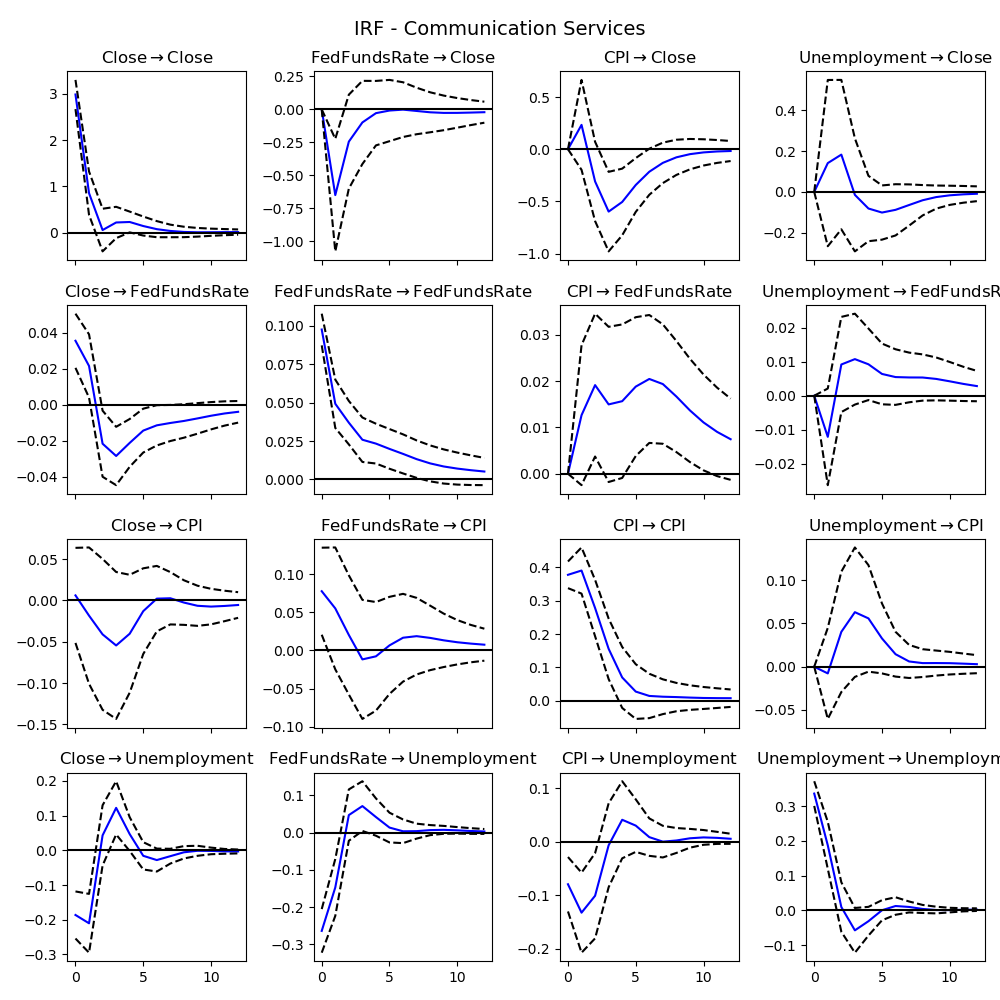

📊 Showing: VAR_IRF_Consumer_Discretionary.png


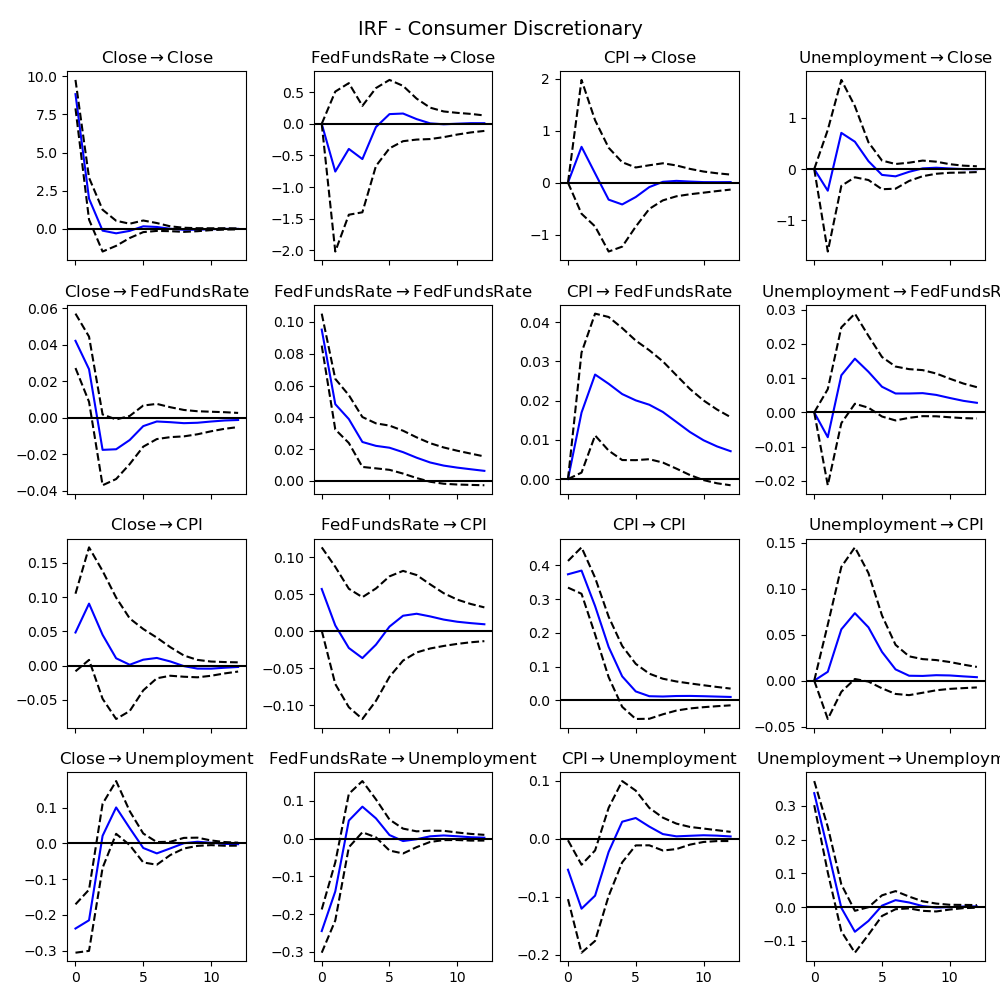

📊 Showing: VAR_IRF_Consumer_Staples.png


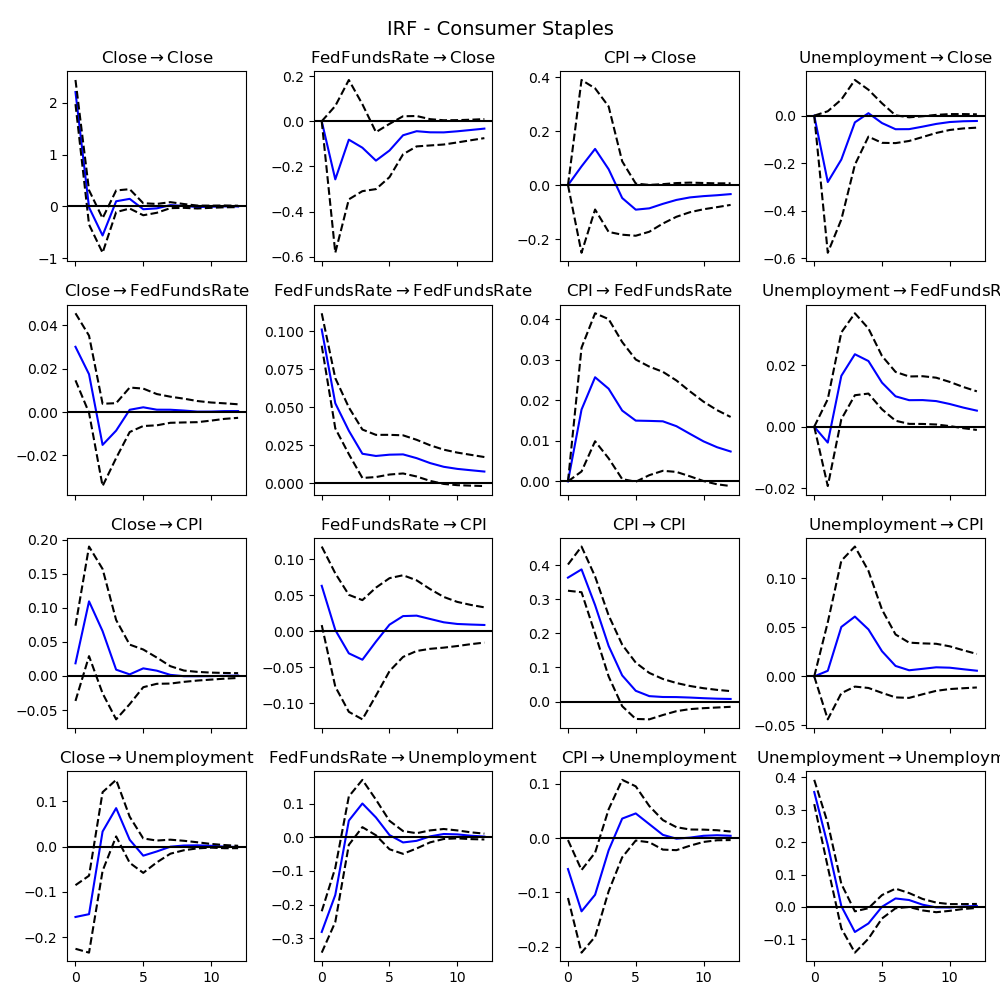

📊 Showing: VAR_IRF_Energy.png


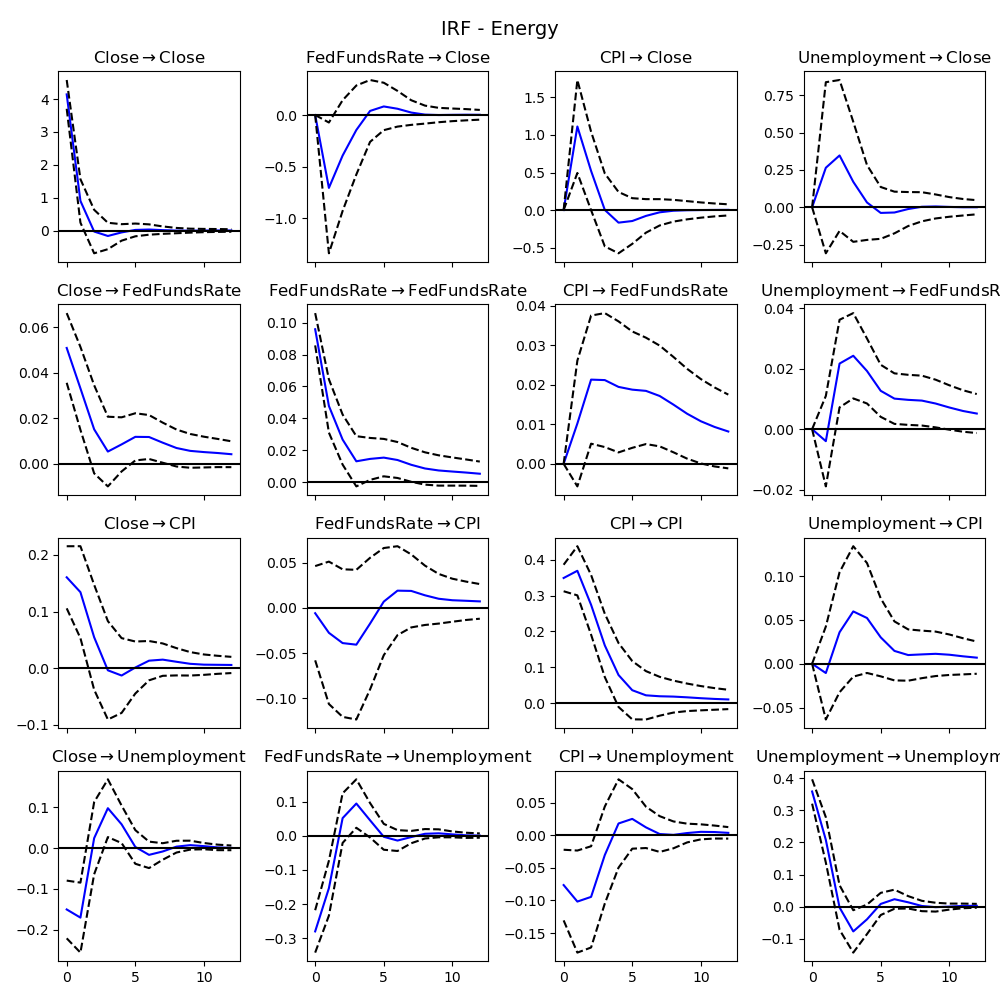

📊 Showing: VAR_IRF_Financials.png


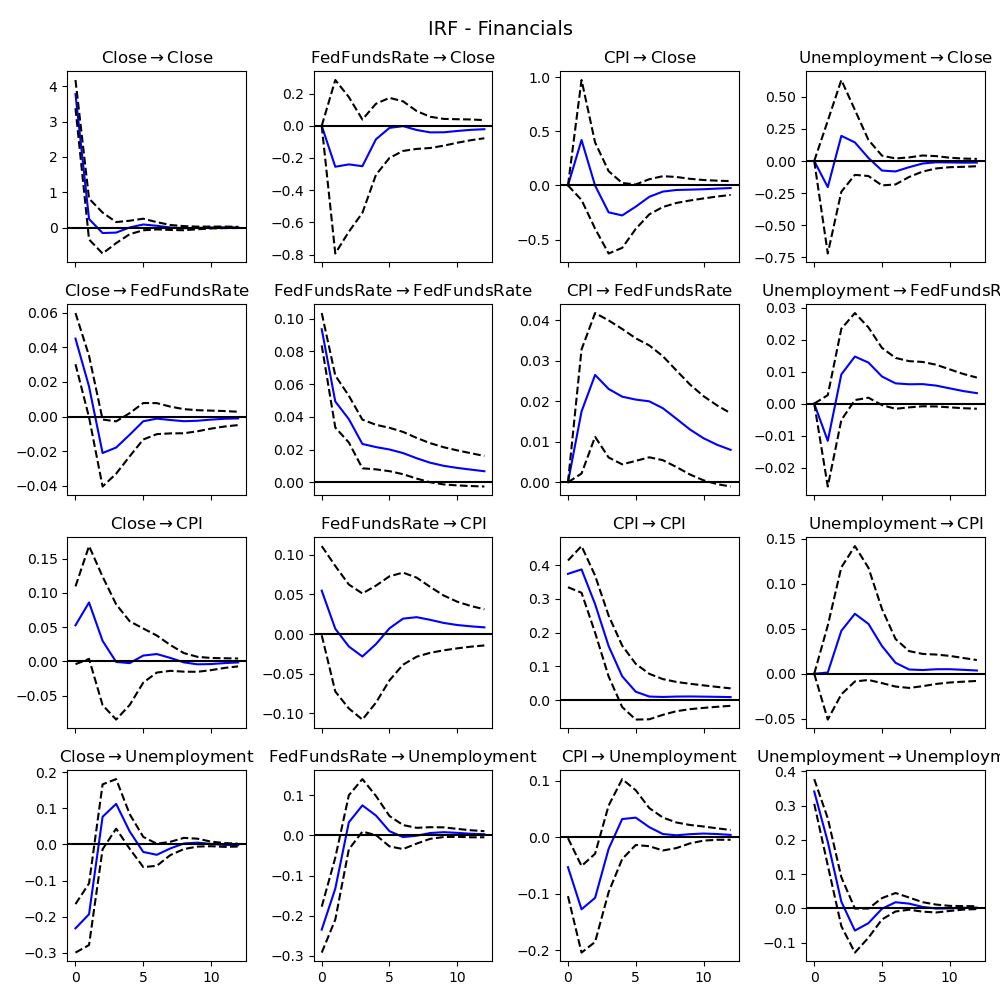

📊 Showing: VAR_IRF_Health_Care.png


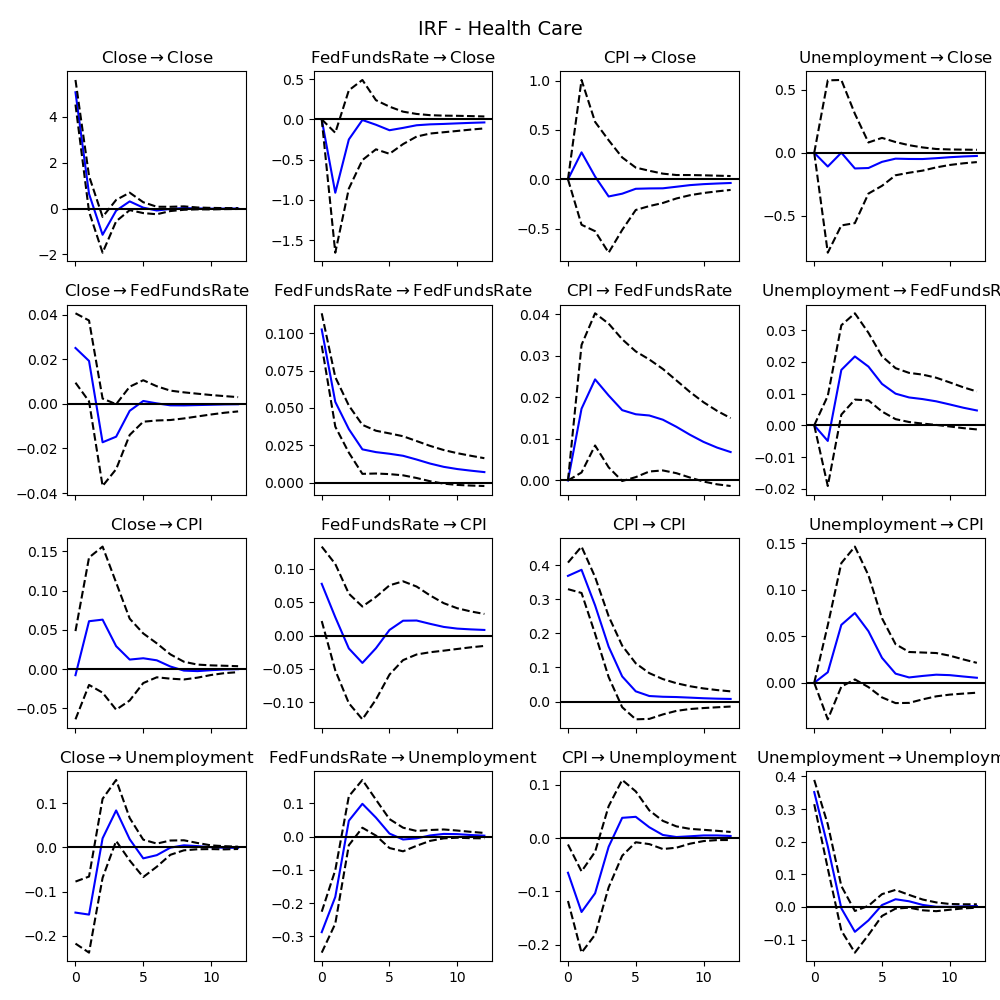

📊 Showing: VAR_IRF_Industrials.png


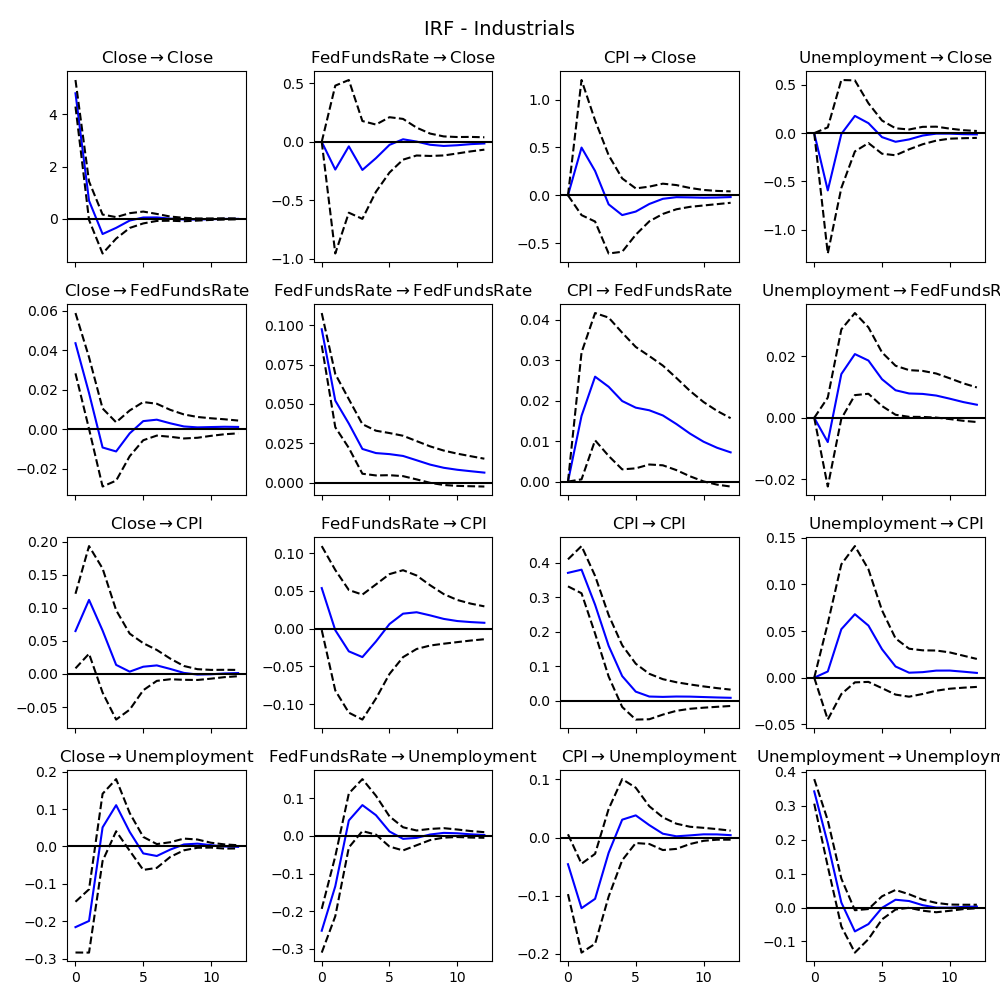

📊 Showing: VAR_IRF_Information_Technology.png


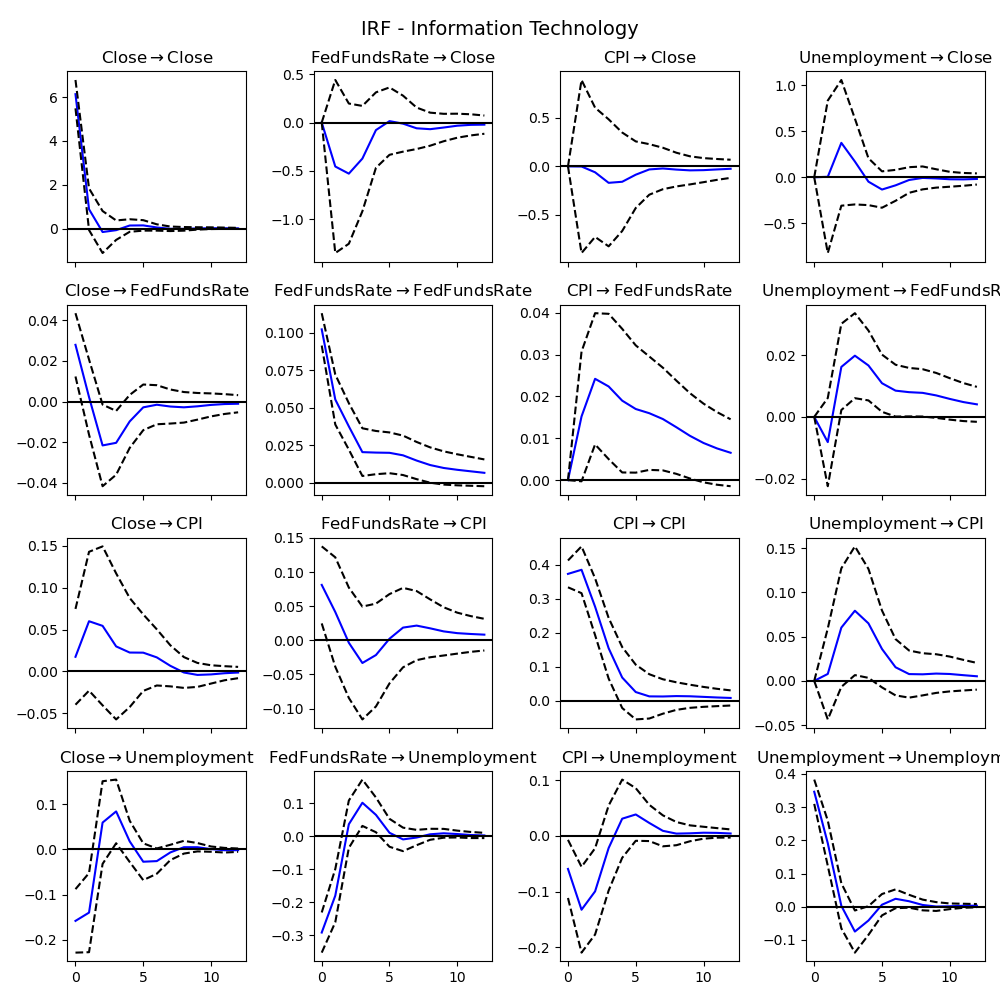

📊 Showing: VAR_IRF_Materials.png


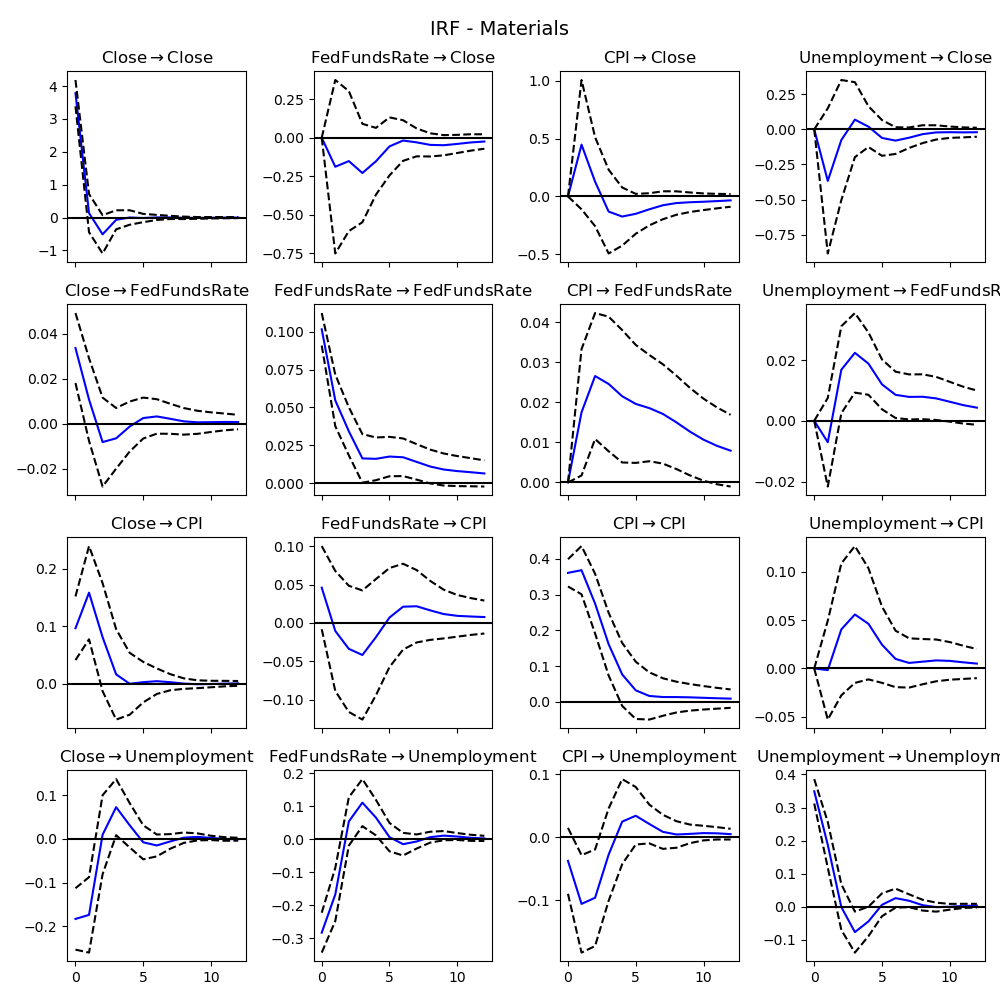

📊 Showing: VAR_IRF_Real_Estate.png


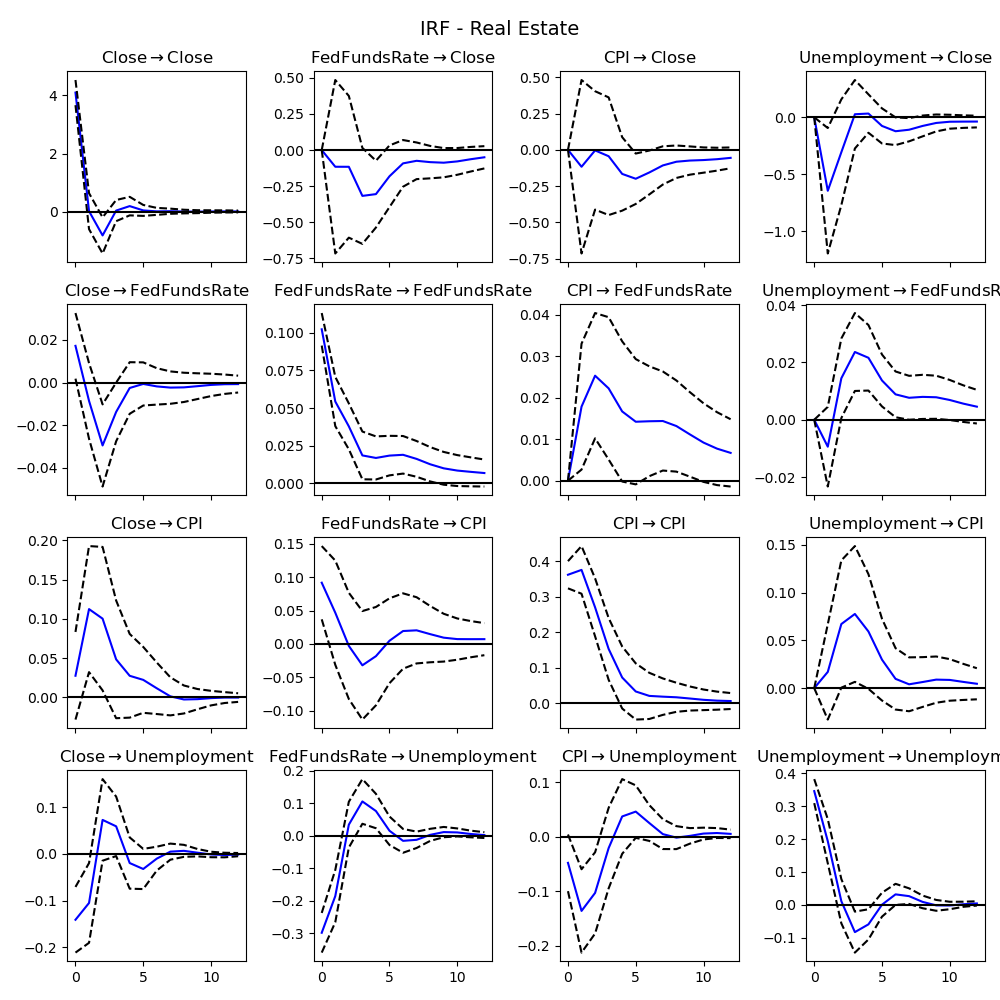

📊 Showing: VAR_IRF_Utilities.png


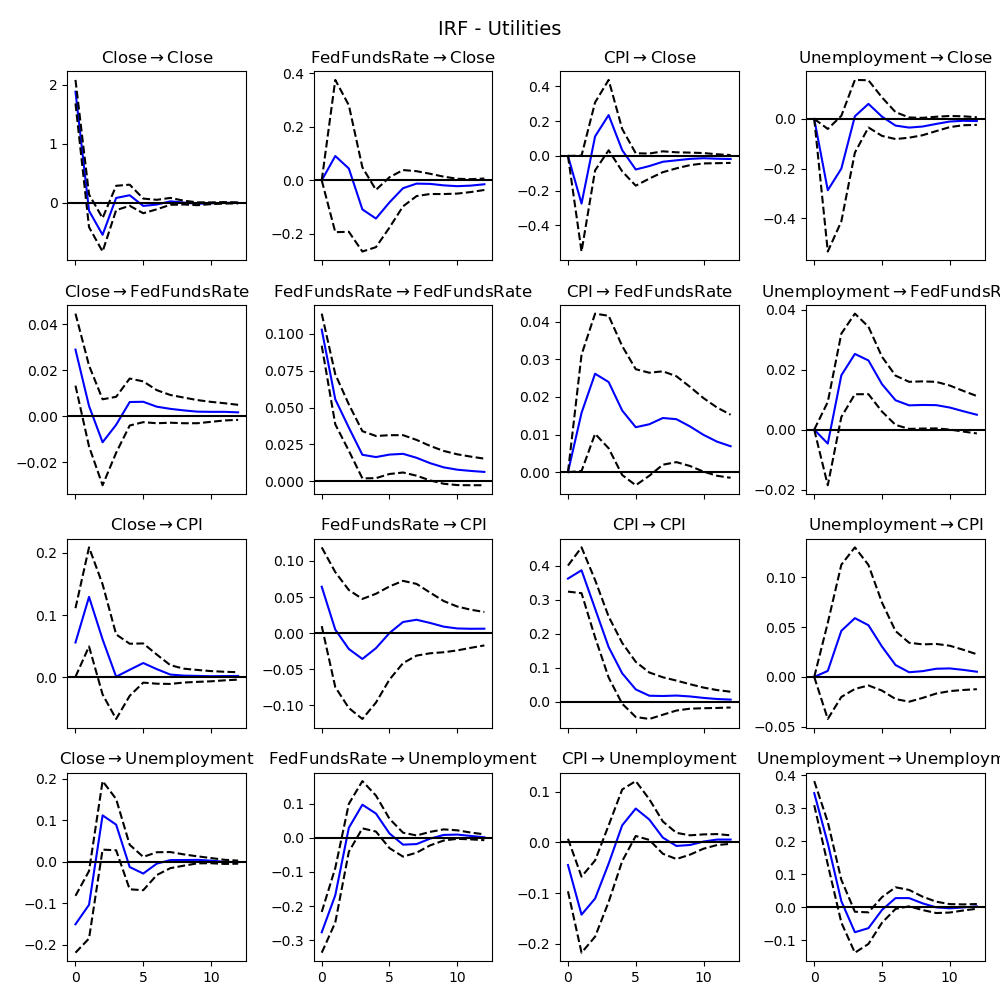

In [26]:
import os
from IPython.display import Image, display

# Path to saved plots
plot_dir = "./var_irf_by_sector"
plot_files = sorted([f for f in os.listdir(plot_dir) if f.endswith(".png")])

# Display each image
for file in plot_files:
    print(f"📊 Showing: {file}")
    display(Image(filename=os.path.join(plot_dir, file)))


In [27]:
import zipfile

plot_dir = "./var_irf_by_sector"
zip_filename = "VAR_IRF_Charts.zip"

with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in os.listdir(plot_dir):
        if file.endswith(".png"):
            zipf.write(os.path.join(plot_dir, file), arcname=file)

print(f"✅ Zip created: {zip_filename}")


✅ Zip created: VAR_IRF_Charts.zip
